In [22]:
from netCDF4 import Dataset                                             
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [16]:
# Dataset from # https://rda.ucar.edu/datasets/ds625.1/index.html#!sfol-wl-/data/ds625.1?g=14
nc_file = './fcst_mdl.200008.nc'                                                    
nc = Dataset(nc_file, mode='r')                                         
nc 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: JRA25 monthly mean 6-hour model-grid forecast
    institution: NCAR-CISL-Data Support Section (DSS)
    source: DSS netCDF version of JRA-25 binary monthly mean file
    history: Thu Mar 20 11:58:20 MDT 2008 -- original netCDF file created
    references: DSS dataset ds625.1 -- http://dss.ucar.edu/datasets/ds625.1
    dimensions(sizes): lon(320), lat(160), mlev(40), ilev(41), time(1)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 mlev(mlev), float32 ilev(ilev), float64 time(time), float64 utc_date(time), float32 a_mlev(mlev), float32 b_mlev(mlev), float32 a_ilev(ilev), float32 b_ilev(ilev), float32 CWAT_HBL(time,mlev,lat,lon), float32 HGT_HBL(time,mlev,lat,lon), float32 SPFH_HBL(time,mlev,lat,lon), float32 TMP_HBL(time,mlev,lat,lon), float32 UGRD_HBL(time,mlev,lat,lon), float32 VGRD_HBL(time,mlev,lat,lon), float32 VVEL_HBL(time,mlev,lat,lon), float32 MFLXB

In [17]:
for i in nc.variables:
    print([i, nc.variables[i].shape])

['lon', (320,)]
['lat', (160,)]
['mlev', (40,)]
['ilev', (41,)]
['time', (1,)]
['utc_date', (1,)]
['a_mlev', (40,)]
['b_mlev', (40,)]
['a_ilev', (41,)]
['b_ilev', (41,)]
['CWAT_HBL', (1, 40, 160, 320)]
['HGT_HBL', (1, 40, 160, 320)]
['SPFH_HBL', (1, 40, 160, 320)]
['TMP_HBL', (1, 40, 160, 320)]
['UGRD_HBL', (1, 40, 160, 320)]
['VGRD_HBL', (1, 40, 160, 320)]
['VVEL_HBL', (1, 40, 160, 320)]
['MFLXB_HBL', (1, 40, 160, 320)]
['PRES_SFC', (1, 160, 320)]
['TMP_SFC', (1, 160, 320)]
['SPFH_SFC', (1, 160, 320)]
['UGRD_SFC', (1, 160, 320)]
['VGRD_SFC', (1, 160, 320)]
['TPRAT_SFC', (1, 160, 320)]
['SRWEQ_SFC', (1, 160, 320)]
['WTMPA_SFC', (1, 160, 320)]


In [31]:
uVw = nc.variables["UGRD_HBL"][0,0,:,:]  # u-component of wind velocity
uVw_units = nc.variables["UGRD_HBL"].units
lat = nc.variables["lat"][:]  # latitude
lon = nc.variables["lon"][:]  # longitude

In [23]:
# get midpoints of latitude and longitude arrays
lat_0 = lat.mean()
lon_0 = lon.mean()

In [38]:
m = Basemap(width=5e7,height=3.5e7,resolution='l',projection='stere',lat_0=lat_0,lon_0=lon_0)

In [40]:
#lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

RuntimeError: Buffer lengths not the same

ERROR: Line magic function `%matplotlib.pyplot` not found.


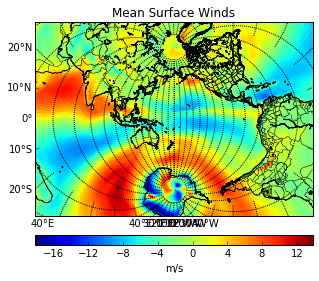

In [41]:
# Plot Data
cs = m.pcolor(xi, yi, uVw)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(uVw_units)

# Add Title
plt.title('Mean Surface Winds')

%matplotlib.pyplot inline
plt.show()